In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df_train = pd.read_csv('./datasets/bike_train.csv')
df_test = pd.read_csv('./datasets/bike_test.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [67]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [68]:
df_train['datetime'] = df_train['datetime'].apply(pd.to_datetime)
df_test['datetime'] = df_test['datetime'].apply(pd.to_datetime)

In [69]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [71]:
df_train['year'] = df_train['datetime'].apply(lambda x : x.year )
df_train['month'] = df_train['datetime'].apply(lambda x : x.month )
df_train['day'] = df_train['datetime'].apply(lambda x : x.day )
df_train['hour'] = df_train['datetime'].apply(lambda x : x.hour )

In [72]:
df_test['year'] = df_test['datetime'].apply(lambda x : x.year )
df_test['month'] = df_test['datetime'].apply(lambda x : x.month )
df_test['day'] = df_test['datetime'].apply(lambda x : x.day )
df_test['hour'] = df_test['datetime'].apply(lambda x : x.hour )

In [74]:
from sklearn.model_selection import train_test_split
X = df_train.drop('count', axis=1)
y = df_train['count']
X_train , X_test , y_train, y_test = train_test_split(X ,y ,test_size=0.3 , random_state=0)

In [75]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
8620,2012-08-01 13:00:00,3,0,1,1,32.80,37.120,52,11.0014,59,221,2012,8,1,13
8985,2012-08-16 18:00:00,3,0,1,1,32.80,35.605,36,0.0000,109,723,2012,8,16,18
6171,2012-02-13 09:00:00,1,0,1,1,4.92,6.820,50,12.9980,7,198,2012,2,13,9
6473,2012-03-06 23:00:00,1,0,1,1,11.48,13.635,61,15.0013,3,51,2012,3,6,23
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,2012,12,19,15


In [61]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,-1.235966,-1.440193,-0.421172,1.620888,2011,1,20,0
1,1,0,1,1,-1.235966,-1.181711,-0.421172,-1.531139,2011,1,20,1
2,1,0,1,1,-1.235966,-1.181711,-0.421172,-1.531139,2011,1,20,2
3,1,0,1,1,-1.235966,-1.267682,-0.421172,-0.197558,2011,1,20,3
4,1,0,1,1,-1.235966,-1.267682,-0.421172,-0.197558,2011,1,20,4


In [76]:
# datetime , casual , registered 컬럼 삭제
X_train.drop(['datetime' , 'casual', 'registered'], axis=1 , inplace=True)
X_test.drop(['datetime' , 'casual', 'registered'], axis=1 , inplace=True)

In [77]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
8620,3,0,1,1,32.80,37.120,52,11.0014,2012,8,1,13
8985,3,0,1,1,32.80,35.605,36,0.0000,2012,8,16,18
6171,1,0,1,1,4.92,6.820,50,12.9980,2012,2,13,9
6473,1,0,1,1,11.48,13.635,61,15.0013,2012,3,6,23
10877,4,0,1,1,17.22,21.210,50,19.0012,2012,12,19,15


In [78]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
6638,1,0,1,1,23.78,27.275,56,7.0015,2012,3,13,21
7975,2,0,1,2,27.06,29.545,89,19.0012,2012,6,12,16
5915,1,0,1,1,18.86,22.725,55,19.0012,2012,2,2,16
8050,2,0,1,1,28.70,31.820,42,11.0014,2012,6,15,19
5894,1,0,1,1,22.14,25.760,52,19.0012,2012,2,1,19


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['temp','atemp','humidity','windspeed']] = scaler.fit_transform(X_train[['temp','atemp','humidity','windspeed']])
X_test[['temp','atemp','humidity','windspeed']] = scaler.fit_transform(X_test[['temp','atemp','humidity','windspeed']])

In [82]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
8620,3,0,1,1,1.626122,1.601958,-0.514300,-0.214718,2012,8,1,13
8985,3,0,1,1,1.626122,1.422806,-1.344799,-1.550279,2012,8,16,18
6171,1,0,1,1,-1.960045,-1.981082,-0.618113,0.027667,2012,2,13,9
6473,1,0,1,1,-1.116241,-1.175194,-0.047145,0.270866,2012,3,6,23
10877,4,0,1,1,-0.377912,-0.279434,-0.618113,0.756451,2012,12,19,15


In [85]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error 

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
ela = ElasticNet(random_state=42)

models = ['LinearRegression' , 'Ridge' , 'Lasso' , 'ElasticNet']
for model in models:
    if model == "LinearRegression":
        estimator = lr
    elif model == "Ridge":
        estimator = ridge
    elif model == "Lasso":
        estimator = lasso
    else :
        estimator = ela
    result = cross_val_score(estimator ,X_train , y_train, cv=5 , scoring='neg_mean_squared_error' )
    avg_rmse = np.mean(np.sqrt(-1 * result))
    print(f'{model}의 rmse의 평균 :{avg_rmse}')
    estimator.fit(X_train , y_train)
    pred = estimator.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_test, pred)
    print(f'{model}의 mse : {mse} , rmse : {rmse} ,  mae : {mae}  , r2score : {r2score}')

    print("==================================")

LinearRegression의 rmse의 평균 :142.14899663784666
LinearRegression의 mse : 19857.803964257353 , rmse : 140.91772054733696 ,  mae : 105.57092595680339  , r2score : 0.3885179071184157
Ridge의 rmse의 평균 :142.14864801754138
Ridge의 mse : 19857.938315613635 , rmse : 140.9181972479553 ,  mae : 105.56923764957465  , r2score : 0.38851377003212617
Lasso의 rmse의 평균 :142.18283236316796
Lasso의 mse : 19871.839886374328 , rmse : 140.96751358513183 ,  mae : 105.19860026822454  , r2score : 0.388085698448864
ElasticNet의 rmse의 평균 :145.68473804489398
ElasticNet의 mse : 20996.342603765876 , rmse : 144.90114769651024 ,  mae : 106.75380920061542  , r2score : 0.35345884462760224


<Axes: >

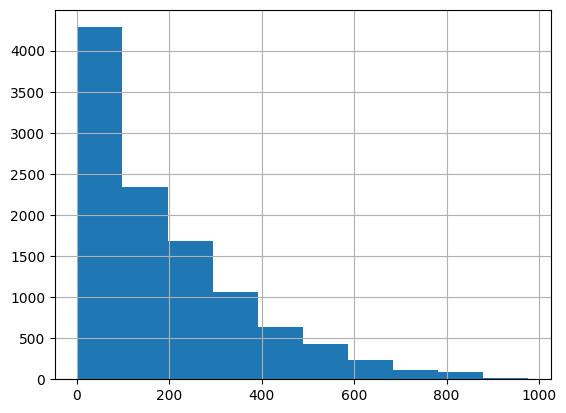

In [94]:
from sklearn.model_selection import train_test_split
X = df_train.drop('count', axis=1)
y = df_train['count']
y.hist()

In [95]:
loged_scaled_y= np.log1p(y)

<Axes: >

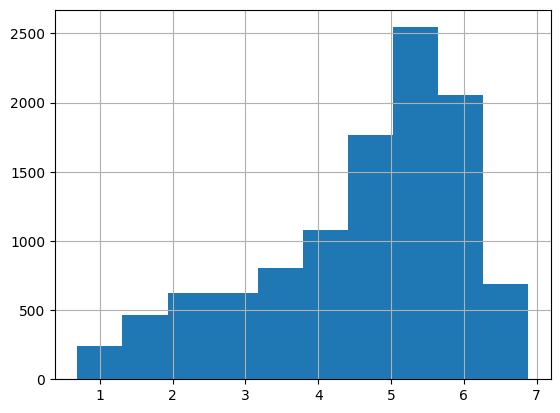

In [96]:
loged_scaled_y.hist()

In [97]:
X_train , X_test , y_train, y_test = train_test_split(X ,loged_scaled_y ,test_size=0.3 , random_state=0)

In [100]:
# datetime , casual , registered 컬럼 삭제
X_train.drop(['datetime' , 'casual', 'registered'], axis=1 , inplace=True)
X_test.drop(['datetime' , 'casual', 'registered'], axis=1 , inplace=True)

In [101]:
for model in models:
    if model == "LinearRegression":
        estimator = lr
    elif model == "Ridge":
        estimator = ridge
    elif model == "Lasso":
        estimator = lasso
    else :
        estimator = ela
    result = cross_val_score(estimator ,X_train , loged_scaled_y_train, cv=5 , scoring='neg_mean_squared_error' )
    avg_rmse = np.mean(np.sqrt(-1 * result))
    print(f'{model}의 rmse의 평균 :{avg_rmse}')
    estimator.fit(X_train , loged_scaled_y_train)
    pred = estimator.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_test, pred)
    print(f'{model}의 mse : {mse} , rmse : {rmse} ,  mae : {mae}  , r2score : {r2score}')

    print("==================================")

LinearRegression의 rmse의 평균 :1.0183591680503818
LinearRegression의 mse : 1.0339363308076928 , rmse : 1.0168265982003484 ,  mae : 0.8014561689021946  , r2score : 0.4884923221915356
Ridge의 rmse의 평균 :1.0183576931796627
Ridge의 mse : 1.0339416360737315 , rmse : 1.0168292069338545 ,  mae : 0.8014566271995471  , r2score : 0.4884896975770108
Lasso의 rmse의 평균 :1.073085569077578
Lasso의 mse : 1.1470428976616023 , rmse : 1.07100088592942 ,  mae : 0.8494217593946747  , r2score : 0.43253638406221595
ElasticNet의 rmse의 평균 :1.053459593251421
ElasticNet의 mse : 1.1077820134611311 , rmse : 1.0525122391027721 ,  mae : 0.8331503963165037  , r2score : 0.4519594791868472
